In [1]:
import pandas as pd
import numpy as np
import scipy.io
import matplotlib
import matplotlib.pylab as plt
import random

from sklearn import cross_validation
from sklearn.grid_search import GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# To model the decision tree 
from sklearn.tree import DecisionTreeClassifier
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB
# To model the KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

import seaborn as sns

/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [3]:
filename = "/Users/Wine.txt"
columns = ["Class","Alcohol","Malic_acid","Ash","Alcal_ash",
           "Mag","Total_ph","Flav_ph","Nonflav_ph","Proan", 
           "Color_inten","Hue","Diluted", "Proline"]
winedata = pd.read_csv(filename, header = None, sep=',',names = columns)

In [5]:
winedata.shape

(178, 14)

In [6]:
winedata.head()

,Class,Alcohol,Malic_acid,Ash,Alcal_ash,Mag,Total_ph,Flav_ph,Nonflav_ph,Proan,Color_inten,Hue,Diluted,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [8]:
y = winedata['Class']
X = winedata.loc[:, 'Alcohol':]

In [705]:
targetnames = X.columns

In [666]:
winedata.describe()

,Class,Alcohol,Malic_acid,Ash,Alcal_ash,Mag,Total_ph,Flav_ph,Nonflav_ph,Proan,Color_inten,Hue,Diluted,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [667]:
y.value_counts()

2    71
1    59
3    48
Name: Class, dtype: int64

In [756]:
winedata.corr()

,Class,Alcohol,Malic_acid,Ash,Alcal_ash,Mag,Total_ph,Flav_ph,Nonflav_ph,Proan,Color_inten,Hue,Diluted,Proline
Class,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic_acid,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcal_ash,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Mag,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total_ph,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flav_ph,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflav_ph,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proan,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


In [600]:
randomfeatures=np.random.choice(winedata.columns.drop('Class'),2)

In [161]:
randomfeatures

array(['Total_ph', 'Alcohol'], dtype=object)

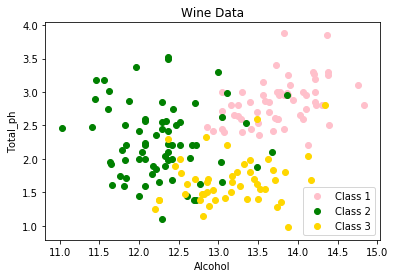

In [721]:
plt.scatter(X[y==1]['Alcohol'], X[y==1]['Total_ph'], label='Class 1', c='Pink')
plt.scatter(X[y==2]['Alcohol'], X[y==2]['Total_ph'], label='Class 2', c='Green')
plt.scatter(X[y==3]['Alcohol'], X[y==3]['Total_ph'], label='Class 3', c='Gold')

plt.legend(loc="lower right")
plt.title("Wine Data")
plt.xlabel('Alcohol')
plt.ylabel('Total_ph')

plt.show()

In [779]:
DTree1 = DecisionTreeClassifier(min_samples_split=6,max_depth=4,
                                min_samples_leaf=2,random_state=100)
DTree1.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=6,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [780]:
for name, importance in zip(targetnames, DTree1.feature_importances_):
    print(name, importance)

('Alcohol', 0.015695067264574022)
('Malic_acid', 0.035874439461883401)
('Ash', 0.0)
('Alcal_ash', 0.0)
('Mag', 0.0)
('Total_ph', 0.0)
('Flav_ph', 0.45101488531504752)
('Nonflav_ph', 0.0)
('Proan', 0.0)
('Color_inten', 0.0)
('Hue', 0.048919690175295558)
('Diluted', 0.0)
('Proline', 0.44849591778319936)


### Above result shows that feature Flav_ph and Proline are the two most relevant variables in the dataset.

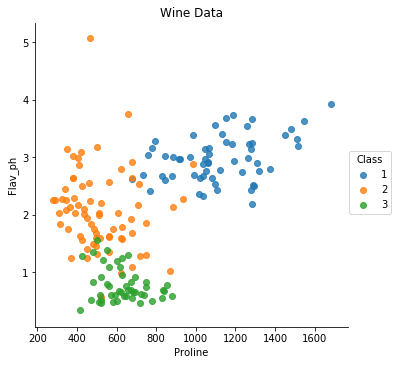

In [793]:
sns.lmplot('Proline','Flav_ph',data=winedata,hue='Class', fit_reg=False)
plt.title('Wine Data')
plt.show()

### Class 1 wine has higher Alcohol and higher Total_ph in comparison to the other 2 classes, Class 2 wine has lower Alcohol and lower Total_ph, and Class 3 wine has higher Alcohol and lower Total_ph.

In [55]:
#winedata.to_csv("/Users/winedata.csv")

winedata.isnull().sum()
#winedata.duplicated().sum()

In [602]:
wine_train, wine_test = train_test_split(winedata,test_size = 0.34,random_state=100)
print len(wine_train), len(wine_test)

117 61


In [768]:
X_train, y_train = wine_train[wine_train.columns.drop('Class')], wine_train['Class']
X_test, y_test = wine_test[wine_test.columns.drop('Class')], wine_test['Class']

#### another way to split
X_train, X_test, y_train, y_test = train_test_split(winedata,y,
                                                    test_size = 0.34,
                                                    random_state=100)

In [604]:
# normalized the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [303]:
X_test.std(),X_train.mean()

(1.0575933111082487, -2.4058481848550399e-16)

In [765]:
param_grid = {'criterion':['gini','entropy'],'max_depth': np.arange(2, 10), 
              'min_samples_split':np.arange(2,10),'min_samples_leaf':np.arange(2,10)}

In [766]:
# use GridSearch to find the best parameters 
gs_tree = GridSearchCV(DTree, param_grid, cv=10)
gs_tree.fit(X_train,y_train)
gs_tree.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 2,
 'min_samples_split': 6}

In [1]:
DTree = DecisionTreeClassifier()

NameError: name 'DecisionTreeClassifier' is not defined

In [769]:
DTree1 = DecisionTreeClassifier(min_samples_split=6,max_depth=4,
                                min_samples_leaf=2,random_state=100)
DTree1.fit(X_train,y_train)
y_pred_tree1 = DTree1.predict(X_test)

In [771]:
print('Accuracy of Decision Tree on training set: {:.2f}'.format(DTree1.score(X_train,y_train)))
print('Accuracy of Decision Tree on test set: {:.2f}'.format(DTree1.score(X_test,y_test)))


Accuracy of Decision Tree on training set: 0.99
Accuracy of Decision Tree on test set: 0.84


In [772]:
print(metrics.classification_report(y_test, y_pred_tree1))

             precision    recall  f1-score   support

          1       0.80      1.00      0.89        16
          2       0.81      0.77      0.79        22
          3       0.90      0.78      0.84        23

avg / total       0.84      0.84      0.83        61



In [637]:
# Gaussian Navie Bayes classifier
NB = GaussianNB()
NB.fit(X_train, y_train)
NB_train_pre = NB.predict(X_train)
NB_test_pre = NB.predict(X_test)

In [638]:
print "The accuracy on training data set is" ,metrics.accuracy_score(y_train, NB_train_pre)
print ""
print "The accuracy on training data set is" ,metrics.accuracy_score(y_test, NB_test_pre)


The accuracy on training data set is 0.974358974359

The accuracy on training data set is 0.967213114754


In [570]:
# KNeighborsClassifier
KNN1 = KNeighborsClassifier(leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')
KNN3 = KNeighborsClassifier(leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')
KNN5 = KNeighborsClassifier(leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

KNN1.fit(X_train, y_train)
KNN3.fit(X_train, y_train)
KNN5.fit(X_train, y_train)
#Predicting the test set results 
y_pred_KNN1_test = KNN1.predict(X_test)
y_pred_KNN3_test = KNN3.predict(X_test)
y_pred_KNN5_test = KNN5.predict(X_test)

y_pred_KNN1_train = KNN1.predict(X_train)
y_pred_KNN3_train = KNN3.predict(X_train)
y_pred_KNN5_train = KNN5.predict(X_train)


In [656]:
distances1,indices1 = KNN1.kneighbors(X_test)
distances3,indices3 = KNN3.kneighbors(X_test)
distances5,indices = KNN5.kneighbors(X_test)

In [659]:
#distances1
#distances3
distances5

array([[ 1.52655856,  1.96544883,  1.97177464,  2.07537437,  2.07624117],
       [ 3.03179177,  3.0848066 ,  3.25523429,  3.3720388 ,  3.46190358],
       [ 1.58202767,  1.86996257,  1.87878964,  1.94303681,  2.08103058],
       [ 2.41884545,  2.65464368,  2.66745392,  2.70140569,  2.73959695],
       [ 4.06919807,  4.15319158,  4.1813769 ,  4.24585255,  4.51873723],
       [ 1.74854305,  2.20383303,  2.22787451,  2.36695425,  2.45851194],
       [ 2.8073426 ,  2.90394205,  3.29483944,  3.65375857,  3.704228  ],
       [ 3.37946033,  3.92108576,  3.92856898,  3.93952926,  4.20837052],
       [ 1.5107332 ,  1.86667494,  2.05135891,  2.09654436,  2.46056436],
       [ 3.15036844,  4.91479088,  4.94038497,  5.41644711,  5.43842188],
       [ 1.78275896,  2.37460455,  2.46079427,  2.70024115,  3.11222833],
       [ 2.1286185 ,  2.46282905,  2.59207436,  2.60033796,  2.6124828 ],
       [ 1.90836721,  2.14520149,  2.27670668,  2.32914525,  2.49762522],
       [ 1.55744343,  2.00967854,  2.0

In [630]:
KNN1.kneighbors_graph(X_test).toarray()

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [590]:
k1train = metrics.accuracy_score(y_train, y_pred_KNN1_train)
k3train = metrics.accuracy_score(y_train, y_pred_KNN3_train)
k5train = metrics.accuracy_score(y_train, y_pred_KNN3_train)

k1test = metrics.accuracy_score(y_test, y_pred_KNN1_test)
k3test = metrics.accuracy_score(y_test, y_pred_KNN3_test)
k5test = metrics.accuracy_score(y_test, y_pred_KNN5_test)

print'Accuracy of K=1 Training set is:', k1train 
print'Accuracy of K=3 Training set is:', k3train 
print'Accuracy of K=5 Training set is:', k5train 
print""

print'Accuracy of K=1 Testing set is:', k1test 
print'Accuracy of K=3 Testing set is:', k3test 
print'Accuracy of K=5 Testing set is:', k5test 
print""

Accuracy of K=1 Training set is: 1.0
Accuracy of K=3 Training set is: 0.974358974359
Accuracy of K=5 Training set is: 0.974358974359

Accuracy of K=1 Testing set is: 0.934426229508
Accuracy of K=3 Testing set is: 0.934426229508
Accuracy of K=5 Testing set is: 0.950819672131



In [643]:
print(metrics.classification_report(y_test, y_pred_KNN1))

             precision    recall  f1-score   support

          1       0.89      1.00      0.94        16
          2       1.00      0.82      0.90        22
          3       0.92      1.00      0.96        23

avg / total       0.94      0.93      0.93        61



In [644]:
print(metrics.classification_report(y_test, y_pred_KNN3))

             precision    recall  f1-score   support

          1       0.89      1.00      0.94        16
          2       1.00      0.82      0.90        22
          3       0.92      1.00      0.96        23

avg / total       0.94      0.93      0.93        61



In [645]:
print(metrics.classification_report(y_test, y_pred_KNN5))

             precision    recall  f1-score   support

          1       0.89      1.00      0.94        16
          2       1.00      0.86      0.93        22
          3       0.96      1.00      0.98        23

avg / total       0.96      0.95      0.95        61



In [735]:
# Evaluating the classifier performances
#Decision Tree 
DTreePerformance = precision_recall_fscore_support(y_test,DTree1.predict(X_test))
# Gaussian Navie Bayes classifier
NBPerformance = precision_recall_fscore_support(y_test,NB.predict(X_test))
# KNeighborsClassifier
KNN5Performance = precision_recall_fscore_support(y_test,KNN5.predict(X_test))


In [736]:
DTreePerformance

(array([ 0.84210526,  0.77272727,  0.9       ]),
 array([ 1.        ,  0.77272727,  0.7826087 ]),
 array([ 0.91428571,  0.77272727,  0.8372093 ]),
 array([16, 22, 23]))

In [737]:
NBPerformance

(array([ 0.88888889,  1.        ,  1.        ]),
 array([ 1.        ,  0.90909091,  1.        ]),
 array([ 0.94117647,  0.95238095,  1.        ]),
 array([16, 22, 23]))

In [738]:
KNNPerformance

(array([ 0.88888889,  1.        ,  0.95833333]),
 array([ 1.        ,  0.86363636,  1.        ]),
 array([ 0.94117647,  0.92682927,  0.9787234 ]),
 array([16, 22, 23]))